In [107]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 


In [108]:
X = np.array([0,1,2,3,4,5,6,7,8,9])
X

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [109]:
y = np.array([3,4,6,2,7,18,23,12,13,16])
y

array([ 3,  4,  6,  2,  7, 18, 23, 12, 13, 16])

In [110]:
def mean(a):
    return ((sum(a))/len(a))

def s_and_i(x,y):
    m_x = mean(x)
    m_y = mean(y)
    s = (sum((x-m_x)*(y-m_y)))/(sum((x-m_x)**2))
    i = (m_y) - (s*m_x)
    return i,s

def predict_y(x,y):
    s,i = s_and_i(x,y)
    y_pred = (i + (s*x))
    return y_pred

def plotting(x,y):
    y_pred = predict_y(x,y)
    plt.scatter(x,y,color = "blue")
    plt.plot(x,y_pred,color = "red")
    plt.title("Simple linar regression")
    plt.show()
    
    
def SST(x,y):
    m_y = mean(y)
    return sum((y-m_y)**2)

def SSR(x,y):
    y_pred = predict_y(x,y)
    y_mean = mean(y)
    SSR_value = sum((y_pred -  y_mean)**2)
    return SSR_value

# value of SSE
def SSE(x,y):
    y_pred = predict_y(x,y)
    SSE_value = sum((y_pred - y )**2)
    return SSE_value

def R(x,y):
    SSR_val = SSR(x,y)
    SST_val = SST(x,y)
    r = 1 - (SSR_val/SST_val)
    return r

# value of VIF
def VIF(x,y):
    r = R(x,y)
    VIF_val = 1 / (1-r)
    return VIF_val 


    
    

In [111]:
# confusion matrix 

actual = [1, 3, 3, 2, 5, 5, 3, 2, 1, 4, 3, 2, 1, 1, 2]
predicted = [1, 2, 3, 4, 2, 3, 3, 2, 1, 2, 3, 1, 5, 1, 1]

In [115]:
def confusion_matrix(a,p):
    classes = np.unique(a)
    n = len(classes)
    
    matrix = np.zeros((n,n))
    
    
    for i in range(n):
        for j in range(n):
            matrix[i][j] = np.sum((a == classes[i])&(p == classes[j]))
    
    return matrix

In [116]:
cm = confusion_matrix(actual, predicted)
cm

array([[3., 0., 0., 0., 1.],
       [2., 1., 0., 1., 0.],
       [0., 1., 3., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0.]])

In [117]:
total_sum = 0
for i in range(5):
    for j in range(5):
        total_sum += cm[i][j]
total_sum

15.0

In [124]:
# Hence we've a case of multi class classification
def params(mat, n):
  col_sum = [sum([row[i] for row in mat]) for i in range(0,len(mat[0]))]
  row_sum = [sum(mat[i]) for i in range(len(mat))]
  tp = mat[n][n]
  fp = row_sum[n] - tp
  fn = col_sum[n] - tp
  tn = 15 - fp - fn - tp
  param = []
  accuracy = (tp + tn) / (tp + tn + fp + fn)
  param.append(accuracy)
  precision = tp / (tp + fp)
  param.append(precision)
  recall = tp / (tp + fn)
  param.append(recall)
  f1_score = (2 * precision * recall) / (precision + recall)
  param.append(f1_score)
  return param

In [125]:
for i in range(len(cm)):
  print(f"For the class {i+1}, the values are as follows: ")
  print(f"Accuracy: {params(cm,i)[0]}")
  print(f"Precision: {params(cm,i)[1]}")
  print(f"Recall: {params(cm,i)[2]}")
  print(f"F1-Score: {params(cm,i)[3]}")
  print("*********************")

For the class 1, the values are as follows: 
Accuracy: 0.8
Precision: 0.75
Recall: 0.6
F1-Score: 0.6666666666666665
*********************
For the class 2, the values are as follows: 
Accuracy: 0.6
Precision: 0.25
Recall: 0.25
F1-Score: 0.25
*********************
For the class 3, the values are as follows: 
Accuracy: 0.8666666666666667
Precision: 0.75
Recall: 0.75
F1-Score: 0.75
*********************
For the class 4, the values are as follows: 
Accuracy: 0.8666666666666667
Precision: 0.0
Recall: 0.0
F1-Score: nan
*********************
For the class 5, the values are as follows: 
Accuracy: 0.8
Precision: 0.0
Recall: 0.0
F1-Score: nan
*********************


C:\Users\manav\AppData\Local\Temp\ipykernel_6856\1798737908.py:16: RuntimeWarning: invalid value encountered in double_scalars
  f1_score = (2 * precision * recall) / (precision + recall)


# Gradient descent

In [130]:
def mean_squared_error(y,y_pred):
    cost = np.sum((y-y_pred)**2)/len(y)
    return cost 


def gradient(x,y,learning_rate,epsilon,iterations):
    current_weight = 0.0
    current_bias = 0.0
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))
    
    costs = []
    weights = []
    
    
    
    previous_cost = None
    
    for i in range(iterations):
        y_pred = current_weight + x*current_bias
        
        current_cost = mean_squared_error(y,y_pred)
        
        if previous_cost and abs(previous_cost - current_cost)<=epsilon:
            break
        
        previous_cost = current_cost
        
        costs.append(current_cost)
        weights.append(current_weight)
        
        # calculating the gradient
        weight_g = -(2/n) * sum(x*(y-y_pred))
        bias_g = (-2/n) * sum(y-y_pred)
        
        current_weight = current_weight - learning_rate*(weight_g)
        current_bias = current_weight - learning_rate*(bias_g)
        
        print(f"iteration {i+1} :")
        print(f"bias = {current_bias} and weight = {current_weight}")
    # Visualizing the weights and cost at for all iterations
    plt.figure(figsize = (8,6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()   
        
    return current_weight,current_bias

In [131]:
# Data
X = np.array([2,3,5,13,8,16,11,2])
Y = np.array([15,28,42,64,50,90,58,8])

iteration 1 :
bias = 1.00125 and weight = 0.9125
iteration 2 :
bias = 1.720015 and weight = 1.64810875
iteration 3 :
bias = 2.31517823125 and weight = 2.25552467375
iteration 4 :
bias = 2.80632902913375 and weight = 2.75681775195
iteration 5 :
bias = 3.211675282981042 and weight = 3.1705338539219485
iteration 6 :
bias = 3.54620657803465 and weight = 3.5119727749872096
iteration 7 :
bias = 3.8222944669222594 and weight = 3.7937615111427534
iteration 8 :
bias = 4.050149150341165 and weight = 4.026321090367284
iteration 9 :
bias = 4.238197083070313 and weight = 4.218251962506165
iteration 10 :
bias = 4.393392598357044 and weight = 4.376652058528111
iteration 11 :
bias = 4.52147509102558 and weight = 4.507379284117992
iteration 12 :
bias = 4.6271812700854325 and weight = 4.615268155019052
iteration 13 :
bias = 4.7144203303085215 and weight = 4.704308585669841
iteration 14 :
bias = 4.786418520918537 and weight = 4.777793443044504
iteration 15 :
bias = 4.845838457789248 and weight = 4.838440

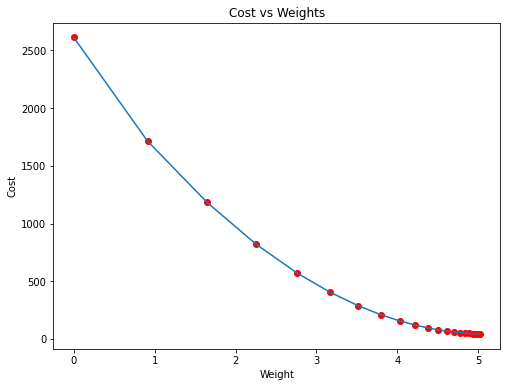

In [132]:
estimated_weight, estimated_bias = gradient(X, Y,0.001,0.5,2000)

In [135]:
dataset = pd.read_csv("50_Startups.csv")
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [138]:
y = dataset.iloc[:,-1].values   # profit

In [141]:
X1 = dataset.iloc[:,0].values  # R and D
X1

array([165349.2 , 162597.7 , 153441.51, 144372.41, 142107.34, 131876.9 ,
       134615.46, 130298.13, 120542.52, 123334.88, 101913.08, 100671.96,
        93863.75,  91992.39, 119943.24, 114523.61,  78013.11,  94657.16,
        91749.16,  86419.7 ,  76253.86,  78389.47,  73994.56,  67532.53,
        77044.01,  64664.71,  75328.87,  72107.6 ,  66051.52,  65605.48,
        61994.48,  61136.38,  63408.86,  55493.95,  46426.07,  46014.02,
        28663.76,  44069.95,  20229.59,  38558.51,  28754.33,  27892.92,
        23640.93,  15505.73,  22177.74,   1000.23,   1315.46,      0.  ,
          542.05,      0.  ])

In [144]:
X2 = dataset.iloc[:,1].values # administration
X2

array([136897.8 , 151377.59, 101145.55, 118671.85,  91391.77,  99814.71,
       147198.87, 145530.06, 148718.95, 108679.17, 110594.11,  91790.61,
       127320.38, 135495.07, 156547.42, 122616.84, 121597.55, 145077.58,
       114175.79, 153514.11, 113867.3 , 153773.43, 122782.75, 105751.03,
        99281.34, 139553.16, 144135.98, 127864.55, 182645.56, 153032.06,
       115641.28, 152701.92, 129219.61, 103057.49, 157693.92,  85047.44,
       127056.21,  51283.14,  65947.93,  82982.09, 118546.05,  84710.77,
        96189.63, 127382.3 , 154806.14, 124153.04, 115816.21, 135426.92,
        51743.15, 116983.8 ])

In [145]:
def parameter(x1,x2,y):
    X1_s = sum((x1)**2) - ((sum(x1)**2) / (len(x1)))
    X2_s = sum((x2)**2) - ((sum(x2)**2) / (len(x2)))
    X1X2 = sum(x1*x2) - ((sum(x1)*sum(x2))/ (len(x1)))
    X1y = sum(x1*y) - sum(X1*y)/len(y)
    X2y = sum(x2*y) - sum(X2*y)/len(y)
    
    mean_y = sum(y)/len(y)
    mean_x1 = sum(x1)/len(y)
    mean_x2 = sum(x2)/len(y)
    
    
    
    b_1 = ((X1_s)*(X2_s) - X1X2*X2y)/(X1_s*X2_s)-(X1X2)
    b_2 = ((X2_s)*(X1_s) - X1X2*X1y)/(X1_s*X2_s)-(X1X2)
    b_0 = mean_y - mean_x1*b_1 + mean_x2*b_2
    
    return b_1, b_2, b_0

In [147]:
def y_pred(x1,x2,y):
    b0,b1,b2 = parameter(x1,x2,y)
    y_pred = b0 + b1*x1 + b2*x2
    return(y_pred)

# K-Means clustering


In [160]:
# importing libraries
from copy import deepcopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [161]:
# Importing the dataset
data = pd.read_csv('xclara.csv')

data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


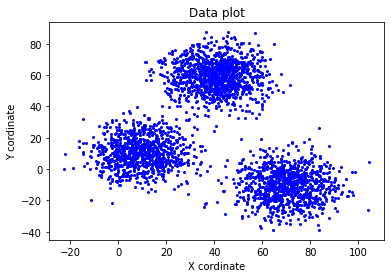

In [171]:
# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='blue',s=4)
plt.title("Data plot")
plt.xlabel("X cordinate")
plt.ylabel("Y cordinate")

plt.show()


In [196]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [197]:
k = 3

In [198]:
C_x = np.random.randint(0,np.max(X)-20,size = k)
C_y = np.random.randint(0,np.max(X)-20,size = k)
C = np.array(list(zip(C_x,C_y)))
C

array([[49, 78],
       [76, 71],
       [20,  5]])

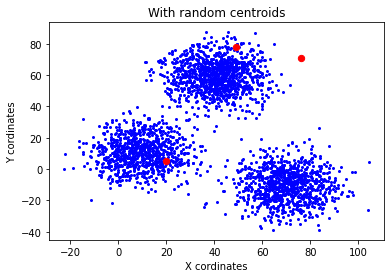

In [199]:
# plotting the graph with centroids 
plt.scatter(f1,f2,color = "blue",s=4)
plt.scatter(C_x,C_y,color = "red",s=40)
plt.title("With random centroids")
plt.xlabel("X cordinates")
plt.ylabel("Y cordinates")

plt.show()

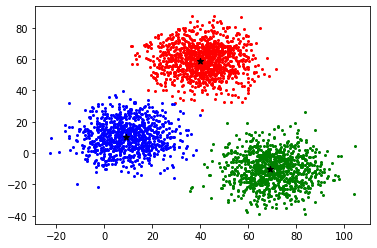

In [208]:


# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1],c=colors[i],s=4)
ax.scatter(C[:, 0], C[:, 1], marker='*',color='black',s=40)
